<a href="https://colab.research.google.com/github/cnhzgb/MachineL/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipdb

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import os
import shutil
from tqdm import tqdm

import ipdb

device = "cuda" if torch.cuda.is_available() else "cpu"

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
dataset = datasets.MNIST(root="dataset/", transform=trans, download=True, train=True) # 6W张图片
loader = DataLoader(dataset, batch_size=60, shuffle=True)
batch_num,(image, label) = next(enumerate(loader))
print(image.shape, label.shape) # 60,1,28,28 ; 60

In [7]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()

    self.conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size = 3, stride = 1)
    self.pool = nn.MaxPool2d(kernel_size = 4, stride = 2) # 池化层
    self.relu = nn.ReLU()
    self.dense = nn.Linear(288, 10)

  def forward(self, x): # 60,1,28,28
    #ipdb.set_trace()
    x = self.conv(x) # => 60,2,26,26
    x = self.relu(x)
    x = self.pool(x) # => 60,2,12,12
    x = x.view(x.size(0), -1) # => 60,288
    x = self.dense(x) # => 60,10
    return x

model = net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [15]:
for epoch in range(1,4):
  for batch_idx, (img, label) in enumerate(loader):
    img = img.to(device)
    label = label.to(device)
    outputs = model(img)
    loss = criterion(outputs, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(batch_idx % 100 == 99):
      print("Loss at {}th epoch{}: {}".format(batch_idx, epoch, loss))

Loss at 99th epoch1: 0.826665997505188
Loss at 199th epoch1: 0.6585585474967957
Loss at 299th epoch1: 0.5506622791290283
Loss at 399th epoch1: 0.8287917971611023
Loss at 499th epoch1: 0.5122794508934021
Loss at 599th epoch1: 0.5874307155609131
Loss at 699th epoch1: 0.4805612564086914
Loss at 799th epoch1: 0.4298938512802124
Loss at 899th epoch1: 0.5530617237091064
Loss at 999th epoch1: 0.6063534617424011
Loss at 99th epoch2: 0.4106919467449188
Loss at 199th epoch2: 0.5483072400093079
Loss at 299th epoch2: 0.3582741320133209
Loss at 399th epoch2: 0.317987322807312
Loss at 499th epoch2: 0.39950746297836304
Loss at 599th epoch2: 0.30582839250564575
Loss at 699th epoch2: 0.39350083470344543
Loss at 799th epoch2: 0.3456815481185913
Loss at 899th epoch2: 0.34297892451286316
Loss at 999th epoch2: 0.3065856397151947
Loss at 99th epoch3: 0.35693779587745667
Loss at 199th epoch3: 0.40257349610328674
Loss at 299th epoch3: 0.2699647843837738
Loss at 399th epoch3: 0.3071187734603882
Loss at 499th e

In [31]:
trans_test = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
dataset_test = datasets.MNIST(root="dataset/", transform=trans_test, download=True, train=False) # 1W张图片
loader_test = DataLoader(dataset_test, batch_size=100, shuffle=True)
criterion_test = nn.CrossEntropyLoss()

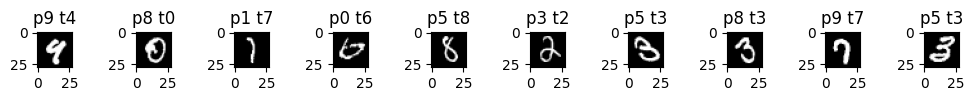

batch 9, loss 0.253569433093071, error 66/1000


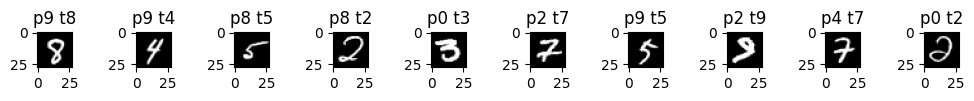

batch 19, loss 0.2859650865197182, error 149/2000


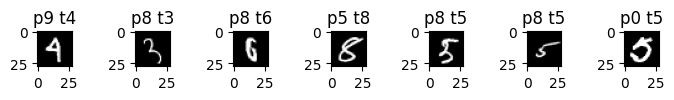

batch 29, loss 0.2828977088133494, error 229/3000


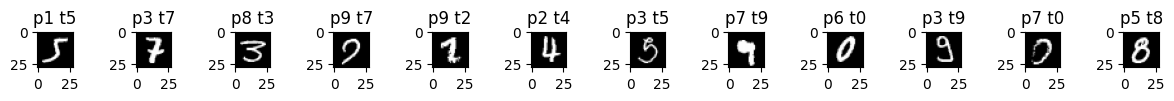

batch 39, loss 0.28573295213282107, error 323/4000


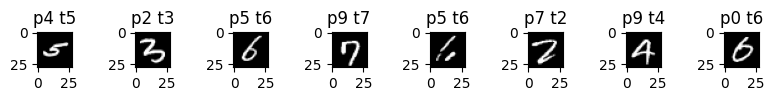

batch 49, loss 0.2882391119003296, error 401/5000


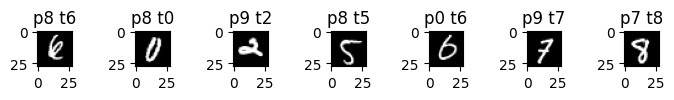

batch 59, loss 0.2820192940533161, error 473/6000


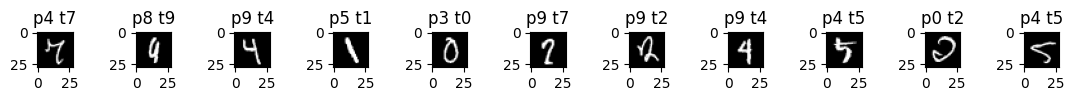

batch 69, loss 0.2879674555999892, error 564/7000


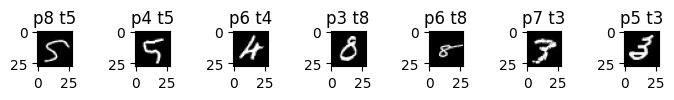

batch 79, loss 0.2867414403706789, error 648/8000


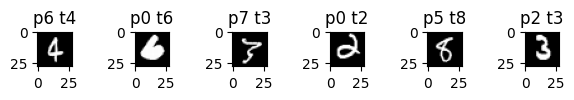

batch 89, loss 0.28576707359817294, error 724/9000


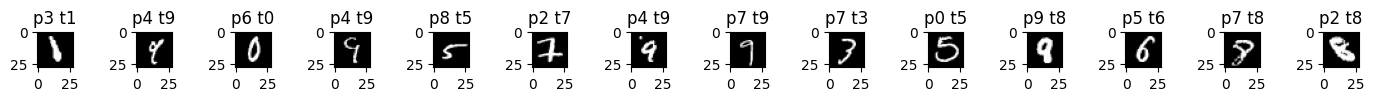

batch 99, loss 0.28897923946380616, error 810/10000


In [35]:
total_loss = []
errorTotal = 0
for batch_idx, (img, label) in enumerate(loader_test): # 1W张图片, 100批, 100,1,28,28
  img = img.to(device)
  label = label.to(device)

  output = model(img)
  loss = criterion_test(output, label)
  total_loss.append(loss.item())

  maxV,maxIdx = output.max(dim=1)
  errorNum = torch.sum(torch.ne(maxIdx, label)).item()
  errorTotal += errorNum

  noMatchIdx = torch.nonzero(torch.ne(maxIdx, label)).view(-1)

  if(batch_idx % 10 == 9):
    fig, axs = plt.subplots(1, errorNum, figsize=(errorNum, 1))
    for i, ax in enumerate(axs.flatten()):
      idx = noMatchIdx[i]
      ax.imshow(img[idx][0].cpu(), cmap='gray')
      ax.set_title('p{} t{}'.format(maxIdx[idx], label[idx]))
    plt.tight_layout()
    plt.show()
    print("batch {}, loss {}, error {}/{}".format(batch_idx, np.mean(total_loss), errorTotal, (batch_idx+1) * 100))